In [ ]:
import ROOT
import numpy as np
import root_numpy as rnp
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
detfile = "utilities/km3net_jul13_90m.detx"
nuefile = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numufile = "utilities/km3_v4_numucc_1_B.evt.aa.root"

numufile2 = "utilities/km3_v4_numucc_2.evt.JTE.aa.root"
nuefile2 = "utilities/km3_v4_nuecc_2.evt.JTE.aa.root"

muatmfile = "utilities/km3net_jul13_90m_muatm10T1.km3_v5r2.evt.JTE.aa.root"

from detector_positions import structured_positions
doms, pmts = structured_positions(detfile)


In [ ]:
from load_trees import load_trees

In [ ]:
ch_id_numu, dom_id_numu, trig_numu, times_numu = load_trees(numufile)
ch_id_nue, dom_id_nue, trig_nue, times_nue = load_trees(nuefile)

ch_id_numu2, dom_id_numu2, trig_numu2, times_numu2 = load_trees(numufile2)
ch_id_nue2, dom_id_nue2, trig_nue2, times_nue2 = load_trees(nuefile2)

ch_id_muatm, dom_id_muatm, trig_muatm, times_muatm = load_trees(muatmfile)

dom_id_muatm = dom_id_muatm[2500:4000]
trig_muatm = trig_muatm[2500:4000]
times_muatm = times_muatm[2500:4000]

print(dom_id_muatm.shape, trig_muatm.shape, times_muatm.shape)

In [6]:
from lattice_doms_znewk import lattice_doms

In [7]:
lattice, l_doms = lattice_doms(detfile)

### totally crazy and inefficient way to define the array of lattice indices (but it works XD )

In [8]:
indices = []
for i, (x,y,z) in enumerate(lattice):
    for j,(xd,yd,zd) in enumerate(l_doms):
        if (x,y,z)==(xd,yd,zd):
            #print(i)
            indices.append((i, j))        

indices = np.asarray(indices)
#doms_map = np.sort(indices, axis=0)[:,0]
doms_map = indices[np.argsort(indices[:,1])][:,0]

In [9]:
i=[]
j=[]
k=[]
for ii,x in enumerate(range(-300,1100,90)):
    for jj,y in enumerate(np.arange(-550,550, 45*np.sqrt(3))):
        for kk,z in enumerate(range(98,712,36)):
            i.append(ii)
            j.append(jj)
            k.append(kk)
        x-= 45
l_i = np.asarray(i)
l_j = np.asarray(j)
l_k = np.asarray(k)

In [10]:
arr = []
for i,j,k in zip(l_i,l_j,l_k):
    arr.append((i,j,k))
lol = np.asarray(arr)

In [11]:
lol.shape

(4320, 3)

In [12]:
ret = np.zeros((16,15,18))

In [13]:
from timeslices import tslices

In [14]:
tslice = tslices(times_numu, times_nue)

(49997887.0, 49993098.0, 50000747.0, 50004225.0, 49993098.0, 50004225.0)


from timeslices import tslices_multi_files

tslice = tslices_multi_files(times_numu, times_nue, times_numu, times_nue, times_muatm, times_muatm)

In [15]:
def  Xy_creation(dom_id, tslice, trig, times, flag):
    nu_events = dom_id.shape[0]
    n_timeslices = tslice.shape[0] - 1
    X_nu = np.zeros((nu_events,n_timeslices, ret.shape[0],ret.shape[1],ret.shape[2]))
    
    for evt in range(nu_events):
        
        triggered_dom_ids = (dom_id[evt][trig[evt] == True]) - 1
        times_event_hits = times[evt]
        for ts, tsl in enumerate(zip(tslice[:-1], tslice[1:])):
                low, high = tsl
                hits = np.where((times_event_hits >= low) & (times_event_hits < high))[0]
                if not len(hits):
                    continue
                dom_hit_in_slice = triggered_dom_ids[hits]
                l_dom_hit_in_slice = doms_map[dom_hit_in_slice]
                l_ret = lol[l_dom_hit_in_slice]
                for dom_indx in l_ret:
                    
                    X_nu[evt, ts, dom_indx[0],dom_indx[1],dom_indx[2]] +=1
    if (flag=='nu_muon'):
        Y_nu = np.ones(dom_id.shape[0])
    elif(flag=='electron'):
        Y_nu = np.zeros(dom_id.shape[0])
    elif(flag=='muon'):
        Y_nu = 2*np.ones(dom_id.shape[0])
    return X_nu, Y_nu

from scipy.fftpack import dct

tr = dct(arr, axis=3)


In [16]:
X_numu, Y_numu = Xy_creation(dom_id_numu, tslice, trig_numu, times_numu, 'nu_muon')

In [ ]:
def plot_x_evt(evt):
    ggg = np.sum(X_numu[evt], axis=0)
    hhh = np.nonzero(ggg)
    return ax.scatter(hhh[0],hhh[1],hhh[2], alpha=0.9)

string = []
for i, pos in enumerate(l_doms):
    if i/18 ==35:
        string.append(pos)

string
string = np.asarray(string, dtype = )

id_orig = dom_id_numu[3][trig_numu[3]==True]

id_map = doms_map[dom_id_numu[3][trig_numu[3]==True]]

l_doms[id_orig]

lattice[id_orig]

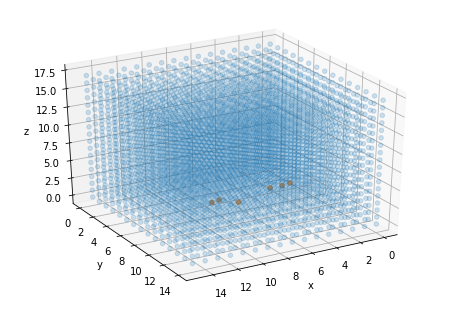

In [309]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(l_i, l_j, l_k , alpha=0.3)
ax.scatter(lol[:,0], lol[:,1], lol[:,2], alpha=0.2)
#ax.scatter(doms["x"], doms["y"], doms["z"], color="grey", alpha=0.02)
plot_x_evt(2)
#ax.scatter(l_doms["x"], l_doms["y"], l_doms[ "z"])
#ax.scatter(lattice["x"], lattice["y"], lattice[ "z"], color='gray')
#ax.scatter(doms[id_orig]["x"], doms[id_orig]["y"], doms[id_orig]["z"], color = 'green')
#ax.scatter(doms[id_map]["x"], doms[id_map]["y"], doms[id_map]["z"], color= 'red')

#ax.scatter(l_doms[id_orig]["x"], l_doms[id_orig]["y"], l_doms[id_orig]["z"], marker = 'x', color = 'blue', alpha = 0.2)
#ax.scatter(doms[id_orig]["x"], doms[id_orig]["y"], doms[id_orig]["z"], color = 'black')
#ax.scatter(lattice[id_map]["x"], lattice[id_map]["y"], lattice[id_map]["z"], color= 'orange', alpha= 0.2, s = 300)



ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 60)
plt.show()

In [17]:
X_nue, Y_nue = Xy_creation(dom_id_nue, tslice, trig_nue, times_nue, 'electron')

For multiple numu-nue files

X_numu2, Y_numu2 = Xy_creation(dom_id_numu2, tslice, trig_numu2, times_numu2, 'muon')
X_nue2, Y_nue2 = Xy_creation(dom_id_nue2, tslice, trig_nue2, times_nue2, 'electron')

X_numu = np.vstack((X_numu, X_numu2))

X_nue = np.vstack((X_nue, X_nue2))

Y_numu = np.concatenate((Y_numu, Y_numu2))

Y_nue = np.concatenate((Y_nue, Y_nue2))

X_mu, Y_mu = Xy_creation(dom_id_muatm, tslice, trig_muatm, times_muatm, 'muon')

In [18]:
X_numu.shape

(1541, 75, 16, 15, 18)

swipe axes to make time last dimension

X_numu_sw_12 = np.swapaxes(X_numu, 1,2)
X_numu_sw_23 = np.swapaxes(X_numu_sw_12, 2,3)
X_numu_sw_34 = np.swapaxes(X_numu_sw_23, 3,4)

X_nue_sw_12 = np.swapaxes(X_nue, 1,2)
X_nue_sw_23 = np.swapaxes(X_nue_sw_12, 2,3)
X_nue_sw_34 = np.swapaxes(X_nue_sw_23, 3,4)

X_numu = X_numu_sw_34
X_nue = X_nue_sw_34

In [20]:
print('X_numu: ', X_numu.shape, 'X_nue: ', X_nue.shape, 'Y_numu: ', Y_numu.shape, 'Y_nue: ', Y_nue.shape)

('X_numu: ', (1541, 75, 16, 15, 18), 'X_nue: ', (1183, 75, 16, 15, 18), 'Y_numu: ', (1541,), 'Y_nue: ', (1183,))


In [19]:
X = np.vstack((X_numu, X_nue))

X_mu.shape

X = np.vstack((X_numu, X_nue, X_mu))

In [21]:
X.shape

(2724, 75, 16, 15, 18)

Y_mu

In [22]:
import keras

Using TensorFlow backend.


In [23]:
keras.backend.image_data_format()

'channels_first'

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [25]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy

### concatenate Y to use data with StratifiedKFold (train-test split), otherwise concatenate later, after converting Y to categorical

In [26]:
Y = np.concatenate((Y_numu, Y_nue))

Y = np.concatenate((Y_numu, Y_nue, Y_mu))

In [27]:
print("X shape: %d, Y shape: %d" %(X.shape[0], Y.shape[0]) )

X shape: 2724, Y shape: 2724


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [29]:
X_train.shape

(2179, 75, 16, 15, 18)

In [30]:
X_test.shape

(545, 75, 16, 15, 18)

input_shape for "channels_first" image_data_format

In [31]:
img_channel = X_train.shape[1]
conv_dim_1 = X_train.shape[2]
conv_dim_2 = X_train.shape[3]
conv_dim_3 = X_train.shape[4]
inputshape = (img_channel, conv_dim_1, conv_dim_2, conv_dim_3)
print(inputshape)

(75, 16, 15, 18)


input shape for " image_data_format" = "channels_last

img_channel = X_train.shape[4]
conv_dim_1 = X_train.shape[1]
conv_dim_2 = X_train.shape[2]
conv_dim_3 = X_train.shape[3]
inputshape = (conv_dim_1, conv_dim_2, conv_dim_3, img_channel)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
def history_plot(history, name):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.legend(['Training', 'Validation'])
    plt.savefig("plots/Loss_"+name+".png")
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.savefig("plots/Accuracy"+name+".png")

In [33]:
def cnn_model():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [34]:
create_nn_model = cnn_model

In [42]:
def cnn_model6():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(ZeroPadding3D((3,3, 3), input_shape=inputshape))
    model.add(Conv3D(128, kernel_size=(6, 6, 6), activation='relu'))
    model.add(Conv3D(64, (6, 6, 6), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [43]:
create_nn_model = cnn_model6

In [33]:
from keras import backend as K
K.clear_session()

In [34]:
def cnn_model8():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(ZeroPadding3D((3,3, 3), input_shape=inputshape))
    model.add(Conv3D(128, kernel_size=(8, 8, 8), activation='relu'))
    model.add(Conv3D(64, (8, 8, 8), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [35]:
create_nn_model = cnn_model8

In [295]:
def cnn_shallow_model():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    #model.add(ZeroPadding3D((3,3,3)
    model.add(Conv3D(128, kernel_size=(8, 8, 8), activation='relu', input_shape=inputshape))
    model.add(Conv3D(64, (8, 8, 8), activation='relu'))
    #model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [296]:
create_nn_model = cnn_shallow_model

In [47]:
epchs = 100
batch = 32

#cnn cnn model
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_cnn100=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_cnn100.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_24 (Conv3D)           (None, 32, 2, 1, 3)       276

1453/1453 [==============================] - 22s - loss: 0.5577 - acc: 0.7275 - val_loss: 0.5711 - val_acc: 0.6377
Epoch 4/100
1453/1453 [==============================] - 22s - loss: 0.4363 - acc: 0.8073 - val_loss: 0.5191 - val_acc: 0.7121
Epoch 5/100
1453/1453 [==============================] - 22s - loss: 0.3898 - acc: 0.8376 - val_loss: 0.4272 - val_acc: 0.8471
Epoch 6/100
1453/1453 [==============================] - 22s - loss: 0.2991 - acc: 0.8699 - val_loss: 0.3854 - val_acc: 0.8595
Epoch 7/100
1453/1453 [==============================] - 22s - loss: 0.2880 - acc: 0.8844 - val_loss: 0.3590 - val_acc: 0.8623
Epoch 8/100
1453/1453 [==============================] - 22s - loss: 0.2396 - acc: 0.9036 - val_loss: 0.3487 - val_acc: 0.8678
Epoch 9/100
1453/1453 [==============================] - 22s - loss: 0.2211 - acc: 0.9153 - val_loss: 0.3264 - val_acc: 0.8774
Epoch 10/100
1453/1453 [==============================] - 22s - loss: 0.2128 - acc: 0.9222 - val_loss: 0.3349 - val_acc: 0.

1453/1453 [==============================] - 22s - loss: 4.7633e-04 - acc: 1.0000 - val_loss: 0.7337 - val_acc: 0.9105
Epoch 68/100
1453/1453 [==============================] - 22s - loss: 0.0104 - acc: 0.9993 - val_loss: 0.6626 - val_acc: 0.9063
Epoch 69/100
1453/1453 [==============================] - 22s - loss: 0.0051 - acc: 0.9993 - val_loss: 0.6894 - val_acc: 0.9132
Epoch 70/100
1453/1453 [==============================] - 22s - loss: 3.3896e-04 - acc: 1.0000 - val_loss: 0.6882 - val_acc: 0.9146
Epoch 71/100
1453/1453 [==============================] - 22s - loss: 2.5674e-04 - acc: 1.0000 - val_loss: 0.7289 - val_acc: 0.9118
Epoch 72/100
1453/1453 [==============================] - 22s - loss: 3.1602e-04 - acc: 1.0000 - val_loss: 0.7833 - val_acc: 0.9063
Epoch 73/100
1453/1453 [==============================] - 22s - loss: 2.0350e-04 - acc: 1.0000 - val_loss: 0.7592 - val_acc: 0.9118
Epoch 74/100
1453/1453 [==============================] - 22s - loss: 2.4623e-04 - acc: 1.0000 - 

1453/1453 [==============================] - 22s - loss: 0.0118 - acc: 0.9993 - val_loss: 0.6707 - val_acc: 0.9132
Epoch 82/100
1453/1453 [==============================] - 22s - loss: 0.0118 - acc: 0.9993 - val_loss: 0.6782 - val_acc: 0.9132
Epoch 83/100
1453/1453 [==============================] - 22s - loss: 0.0136 - acc: 0.9986 - val_loss: 0.6522 - val_acc: 0.9160
Epoch 84/100
1453/1453 [==============================] - 22s - loss: 0.0121 - acc: 0.9993 - val_loss: 0.6845 - val_acc: 0.9146
Epoch 85/100
1453/1453 [==============================] - 22s - loss: 0.0117 - acc: 0.9993 - val_loss: 0.6740 - val_acc: 0.9160
Epoch 86/100
1453/1453 [==============================] - 22s - loss: 0.0293 - acc: 0.9959 - val_loss: 0.7346 - val_acc: 0.9146
Epoch 87/100
1453/1453 [==============================] - 22s - loss: 0.0117 - acc: 0.9993 - val_loss: 0.6780 - val_acc: 0.9160
Epoch 88/100
1453/1453 [==============================] - 22s - loss: 0.0116 - acc: 0.9993 - val_loss: 0.6648 - val_a

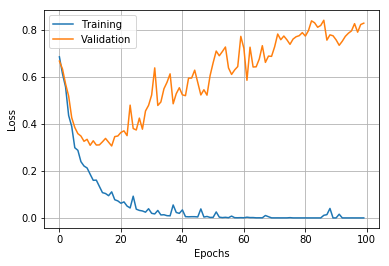

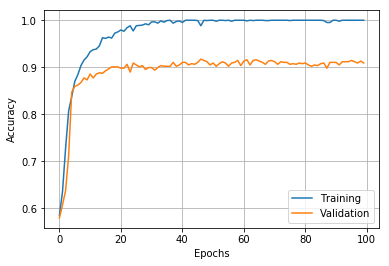

In [51]:
history_plot(histories_cnn100[1])

In [320]:
epchs = 30
batch = 32

#cnn shallow model
skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_cnn=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_cnn.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 32, 2, 1, 3)       276

Train on 1744 samples, validate on 435 samples
Epoch 1/30
1744/1744 [==============================] - 25s - loss: 0.6972 - acc: 0.5648 - val_loss: 0.6903 - val_acc: 0.5724
Epoch 2/30
1744/1744 [==============================] - 25s - loss: 0.6320 - acc: 0.6170 - val_loss: 0.6062 - val_acc: 0.6000
Epoch 3/30
1744/1744 [==============================] - 25s - loss: 0.5543 - acc: 0.7236 - val_loss: 0.4934 - val_acc: 0.7379
Epoch 4/30
1744/1744 [==============================] - 25s - loss: 0.4429 - acc: 0.8108 - val_loss: 0.4115 - val_acc: 0.8437
Epoch 5/30
1744/1744 [==============================] - 25s - loss: 0.3681 - acc: 0.8492 - val_loss: 0.3668 - val_acc: 0.8575
Epoch 6/30
1744/1744 [==============================] - 25s - loss: 0.3138 - acc: 0.8693 - val_loss: 0.3228 - val_acc: 0.8644
Epoch 7/30
1744/1744 [==============================] - 25s - loss: 0.2793 - acc: 0.8825 - val_loss: 0.2973 - val_acc: 0.8805
Epoch 8/30
1744/1744 [==============================] - 25s - loss: 0.2

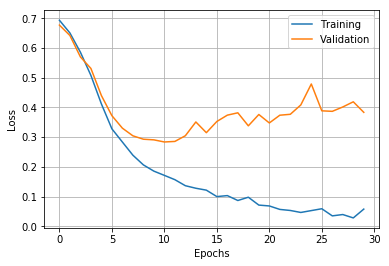

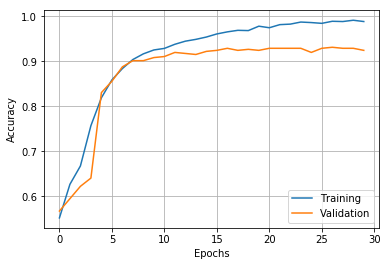

In [328]:
history_plot(histories_cnn[0])

In [44]:
#lab
epchs = 40
batch = 32

#cnn shallow model
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_cnn6=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_cnn6.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_2 (ZeroPaddin (None, 75, 22, 21, 24)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 128, 17, 16, 19)   2073728   
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 64, 12, 11, 14)    1769536   
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 4, 3, 5)       0  

Train on 1453 samples, validate on 726 samples
Epoch 1/40
1453/1453 [==============================] - 42s - loss: 0.7081 - acc: 0.5733 - val_loss: 0.6981 - val_acc: 0.5675
Epoch 2/40
1453/1453 [==============================] - 40s - loss: 0.6476 - acc: 0.6249 - val_loss: 0.6409 - val_acc: 0.6033
Epoch 3/40
1453/1453 [==============================] - 40s - loss: 0.5704 - acc: 0.7268 - val_loss: 0.5352 - val_acc: 0.6915
Epoch 4/40
1453/1453 [==============================] - 40s - loss: 0.4186 - acc: 0.8224 - val_loss: 0.4014 - val_acc: 0.8705
Epoch 5/40
1453/1453 [==============================] - 40s - loss: 0.2980 - acc: 0.8796 - val_loss: 0.3640 - val_acc: 0.8691
Epoch 6/40
1453/1453 [==============================] - 40s - loss: 0.2355 - acc: 0.9112 - val_loss: 0.3596 - val_acc: 0.8719
Epoch 7/40
1453/1453 [==============================] - 40s - loss: 0.1944 - acc: 0.9264 - val_loss: 0.3452 - val_acc: 0.8802
Epoch 8/40
1453/1453 [==============================] - 40s - loss: 0.1

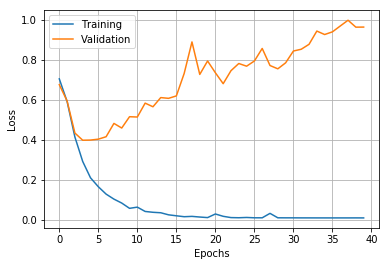

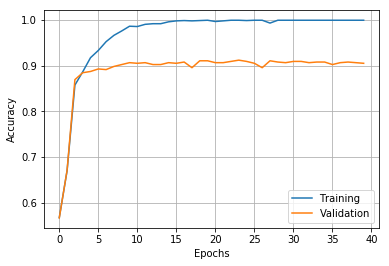

In [45]:
history_plot(histories_cnn6[0], "histories_cnn6_40epchs")

In [36]:
#lab
epchs = 40
batch = 32

#cnn shallow model
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_cnn8=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_cnn8.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)


ValueError: Negative dimension size caused by subtracting 3 from 2 for 'conv3d_4/convolution' (op: 'Conv3D') with input shapes: [?,2,1,3,32], [3,3,3,32,32].

In [ ]:
history_plot(histories_cnn8[0], "histories_cnn8_40epchs")

In [36]:
# 6*6*6 kernel
epchs = 20
batch = 32

#cnn shallow model
skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_cnn6=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_cnn6.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_1 (ZeroPaddin (None, 75, 22, 21, 24)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 128, 17, 16, 19)   2073728   
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 12, 11, 14)    1769536   
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 4, 3, 5)       0  

1744/1744 [==============================] - 111s - loss: 0.0290 - acc: 0.9920 - val_loss: 0.4380 - val_acc: 0.9103
Epoch 14/20
1744/1744 [==============================] - 111s - loss: 0.0231 - acc: 0.9943 - val_loss: 0.4753 - val_acc: 0.9149
Epoch 15/20
1744/1744 [==============================] - 111s - loss: 0.0342 - acc: 0.9908 - val_loss: 0.5315 - val_acc: 0.9103
Epoch 16/20
1744/1744 [==============================] - 111s - loss: 0.0113 - acc: 0.9977 - val_loss: 0.5877 - val_acc: 0.9034
Epoch 17/20
1744/1744 [==============================] - 111s - loss: 0.0774 - acc: 0.9839 - val_loss: 0.4851 - val_acc: 0.9080
Epoch 18/20
1744/1744 [==============================] - 111s - loss: 0.0170 - acc: 0.9983 - val_loss: 0.5349 - val_acc: 0.9103
Epoch 19/20
1744/1744 [==============================] - 111s - loss: 0.0152 - acc: 0.9983 - val_loss: 0.5122 - val_acc: 0.9057
Epoch 20/20
1744/1744 [==============================] - 111s - loss: 0.0327 - acc: 0.9937 - val_loss: 0.5073 - val_

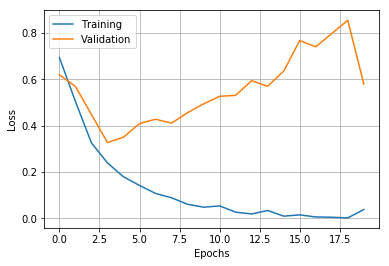

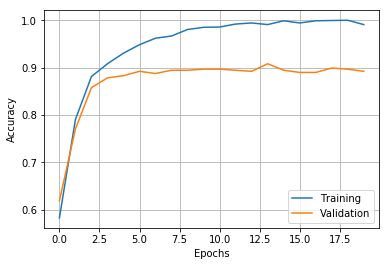

In [43]:
history_plot(histories_cnn6[1])

In [69]:
epchs = 5
batch = 64

#cnn shallow model
skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_shallow64=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_shallow64.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 128, 9, 8, 11)     4915328   
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 64, 2, 1, 4)       4194368   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 2, 1, 4)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 9,110,722
Trainable params: 9,110,722
Non-trainable params: 0
_________________________________________________________________
Train on 1742 samples, validate on 437 samples
Epoch 1/5
1742/1742 [==============================] - 28s - loss: 

In [33]:
epchs = 10
batch = 128

In [41]:
#cnn first attempt - new dataset + tf with 'channels_first'

skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories.append(history)
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)


('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_29 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_30 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 32, 2, 1, 3)       276

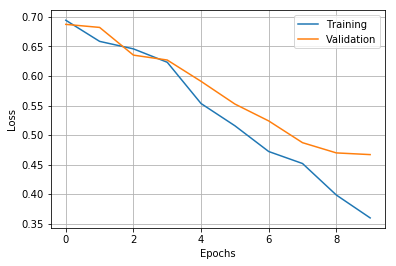

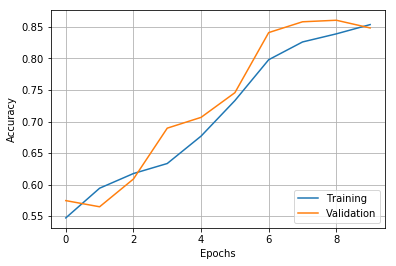

In [52]:
history_plot(histories[2])

In [55]:
epchs = 10
batch = 64

In [56]:
#cnn first attempt - new dataset + tf with 'channels_first'

skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories64=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories64.append(history)
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)


('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 32, 2, 1, 3)       276

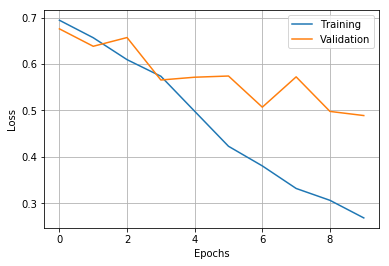

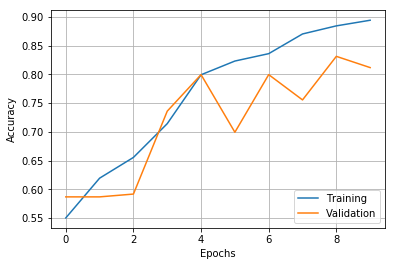

In [58]:
history_plot(histories64[1])

In [59]:
epchs = 10
batch = 32


#cnn first attempt - new dataset + tf with 'channels_first'

skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories32=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories32.append(history)
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_29 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_30 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 32, 2, 1, 3)       276

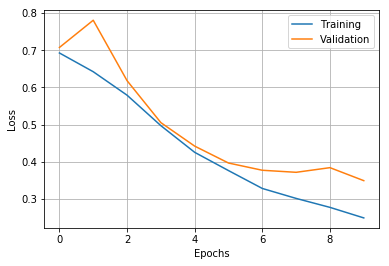

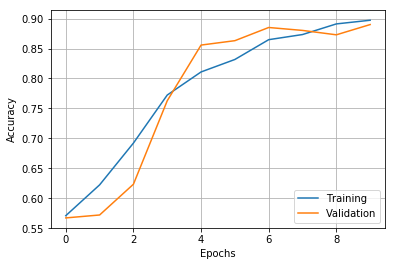

In [60]:
history_plot(histories32[0])

In [61]:
epchs = 20
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories3220=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories3220.append(history)
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_49 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_50 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_51 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_52 (Conv3D)           (None, 32, 2, 1, 3)       276

1634/1634 [==============================] - 23s - loss: 0.1089 - acc: 0.9621 - val_loss: 0.3199 - val_acc: 0.8704
Epoch 20/20
1634/1634 [==============================] - 23s - loss: 0.1067 - acc: 0.9651 - val_loss: 0.3340 - val_acc: 0.8924
('Test nr.: ', 5)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_65 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_66 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_67 (Conv3D)           (None, 32, 4, 3, 5)       55328     
______________

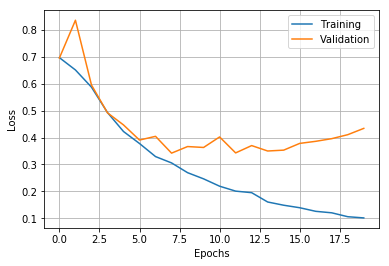

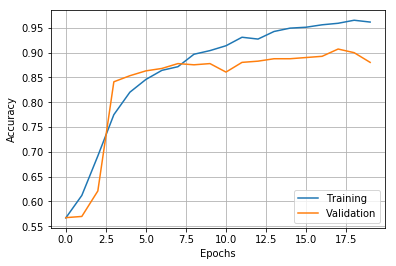

In [63]:
history_plot(histories3220[0])

In [42]:
epchs = 20
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first' - DOUBLE DATASET
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories3220_double=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories3220_double.append(history)
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 32, 2, 1, 3)       276

MemoryError: 

In [49]:
epchs = 30
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first' - 3 classes
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 3
histories3cl=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain, num_classes=3)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories3cl.append(history)
    validation_acc = history.history['val_acc']
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain, num_classes=3)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 32, 2, 1, 3)       276

2113/2113 [==============================] - 28s - loss: 0.2804 - acc: 0.9035    
Epoch 3/30
2113/2113 [==============================] - 29s - loss: 0.2312 - acc: 0.9139    
Epoch 4/30
2113/2113 [==============================] - 29s - loss: 0.2208 - acc: 0.9309    
Epoch 5/30
2113/2113 [==============================] - 29s - loss: 0.3015 - acc: 0.9072    
Epoch 6/30
2113/2113 [==============================] - 29s - loss: 0.2162 - acc: 0.9248    
Epoch 7/30
2113/2113 [==============================] - 28s - loss: 0.1966 - acc: 0.9248    
Epoch 8/30
2113/2113 [==============================] - 29s - loss: 0.2206 - acc: 0.9271    
Epoch 9/30
2113/2113 [==============================] - 29s - loss: 0.1917 - acc: 0.9375    
Epoch 10/30
2113/2113 [==============================] - 28s - loss: 0.2071 - acc: 0.9380    
Epoch 11/30
2113/2113 [==============================] - 29s - loss: 0.1788 - acc: 0.9389    
Epoch 12/30
2113/2113 [==============================] - 29s - loss: 0.1719 - a

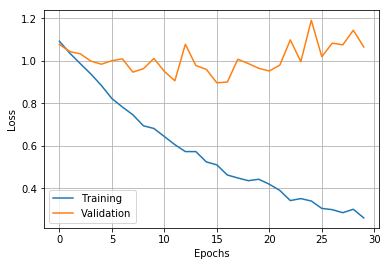

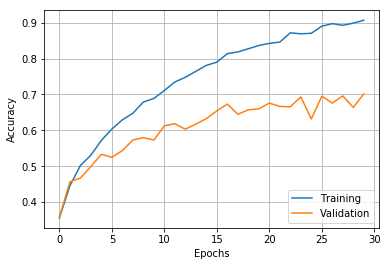

In [53]:
history_plot(histories3cl[1])

In [67]:
epchs = 20
batch = 16

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories1620=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories1620.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print(training_acc, validation_acc)
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 4, 3, 5)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 32, 2, 1, 3)       276

1634/1634 [==============================] - 25s - loss: 0.1578 - acc: 0.9437 - val_loss: 0.4160 - val_acc: 0.8680
Epoch 15/20
1634/1634 [==============================] - 25s - loss: 0.1387 - acc: 0.9449 - val_loss: 0.4843 - val_acc: 0.8704
Epoch 16/20
1634/1634 [==============================] - 25s - loss: 0.1242 - acc: 0.9529 - val_loss: 0.4836 - val_acc: 0.8680
Epoch 17/20
1634/1634 [==============================] - 25s - loss: 0.1241 - acc: 0.9565 - val_loss: 0.5191 - val_acc: 0.8753
Epoch 18/20
1634/1634 [==============================] - 25s - loss: 0.1009 - acc: 0.9663 - val_loss: 0.5586 - val_acc: 0.8729
Epoch 19/20
1634/1634 [==============================] - 25s - loss: 0.1101 - acc: 0.9663 - val_loss: 0.5337 - val_acc: 0.8729
Epoch 20/20
1634/1634 [==============================] - 25s - loss: 0.0890 - acc: 0.9712 - val_loss: 0.5976 - val_acc: 0.8729
([0.56670746634026925, 0.61505507955936356, 0.67197062423500609, 0.73500611995104037, 0.79559363525091797, 0.83659730722154

Train on 1634 samples, validate on 409 samples
Epoch 1/20
1634/1634 [==============================] - 26s - loss: 0.6957 - acc: 0.5734 - val_loss: 0.6937 - val_acc: 0.5672
Epoch 2/20
1634/1634 [==============================] - 25s - loss: 0.6258 - acc: 0.6322 - val_loss: 0.5725 - val_acc: 0.6210
Epoch 3/20
1634/1634 [==============================] - 25s - loss: 0.5273 - acc: 0.7570 - val_loss: 0.4444 - val_acc: 0.8337
Epoch 4/20
1634/1634 [==============================] - 25s - loss: 0.4421 - acc: 0.8237 - val_loss: 0.3834 - val_acc: 0.8533
Epoch 5/20
1634/1634 [==============================] - 25s - loss: 0.3706 - acc: 0.8446 - val_loss: 0.3333 - val_acc: 0.8778
Epoch 6/20
1634/1634 [==============================] - 25s - loss: 0.3315 - acc: 0.8611 - val_loss: 0.3163 - val_acc: 0.8753
Epoch 7/20
1634/1634 [==============================] - 25s - loss: 0.2941 - acc: 0.8807 - val_loss: 0.2938 - val_acc: 0.8875
Epoch 8/20
1634/1634 [==============================] - 25s - loss: 0.2

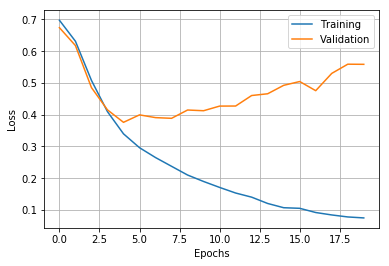

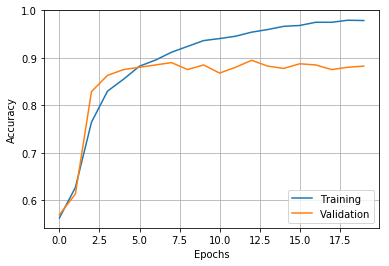

In [69]:
history_plot(histories1620[0])

In [45]:
def cnn_model_bigger_kernel():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(ZeroPadding3D((3,3,3), input_shape=inputshape))
    model.add(Conv3D(128, kernel_size=(8, 8, 8), activation='relu'))#, input_shape=inputshape))
    model.add(Conv3D(64, (6, 6, 6), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))     
    model.add(Dropout(0.1))
    model.add(ZeroPadding3D((3,3,3)))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [46]:
create_nn_model = cnn_model_bigger_kernel

In [ ]:
epchs = 20
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories88=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories88.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_1 (ZeroPaddin (None, 75, 22, 21, 24)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 128, 15, 14, 17)   4915328   
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 64, 10, 9, 12)     1769536   
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 64, 5, 4, 6)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 5, 4, 6)       0         
_________________________________________________________________
zero_padding3d_2 (ZeroPaddin (None, 64, 11, 10, 12)    0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 32, 9, 8, 10)      553

In [44]:
def cnn_model_bigger_kernel_shallow():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(ZeroPadding3D((3,3,3), input_shape=inputshape))
    model.add(Conv3D(128, kernel_size=(8, 8, 8), activation='relu'))#, input_shape=inputshape))
    model.add(Conv3D(64, (6, 6, 6), activation='relu'))
    #model.add(MaxPooling3D(pool_size=(2, 2, 2)))     
    #model.add(ZeroPadding3D((3,3,3)))
    #model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [45]:
create_nn_model = cnn_model_bigger_kernel_shallow

In [46]:
epchs = 20
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=2)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories88sh=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories88sh.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_2 (ZeroPaddin (None, 75, 22, 21, 24)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 128, 15, 14, 17)   4915328   
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 64, 10, 9, 12)     1769536   
_________________________________________________________________
flatten_2 (Flatten)          (None, 69120)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 138242    
Total params: 6,823,106
Trainable params: 6,823,106
Non-trainable params: 0
_________________________________________________________________
Train on 1021 samples, validate on 1022 samples
Epoch 1/20
1021/1021 [==============================] - 89s - loss

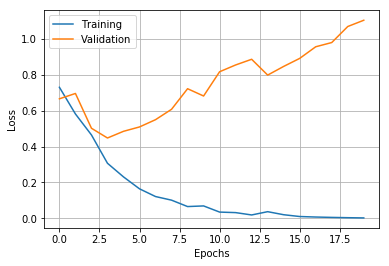

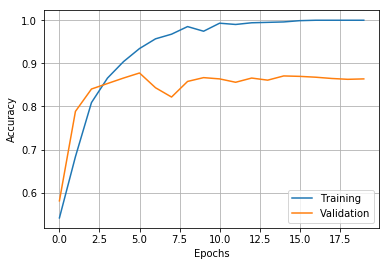

In [49]:
history_plot(histories88sh[0])

In [52]:
def cnn_model_bigger_kernel_shallow2():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(ZeroPadding3D((3,3,3), input_shape=inputshape))
    model.add(Conv3D(128, kernel_size=(9, 9, 9), activation='relu'))#, input_shape=inputshape))
    model.add(Dropout(0.25))
    model.add(Conv3D(64, (8, 8, 8), activation='relu'))
    #model.add(MaxPooling3D(pool_size=(2, 2, 2)))     
    #model.add(ZeroPadding3D((3,3,3)))
    #model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    #model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [53]:
create_nn_model=cnn_model_bigger_kernel_shallow2

In [ ]:
epchs = 20
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=2)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories99sh=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories99sh.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_6 (ZeroPaddin (None, 75, 22, 21, 24)    0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 128, 14, 13, 16)   6998528   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 14, 13, 16)   0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 64, 7, 6, 9)       4194368   
_________________________________________________________________
flatten_6 (Flatten)          (None, 24192)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 48386     
Total params: 11,241,282
Trainable params: 11,241,282
Non-trainable params: 0
______________________________________________

In [70]:
def cnn_model_sigmoid():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    #model.add(Dropout(0.1))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Conv3D(32, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [71]:
create_nn_model = cnn_model_sigmoid

In [72]:
epchs = 20
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=5)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_sig_32=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_sig_32.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print(training_acc, validation_acc)
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 128, 14, 13, 16)   259328    
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 64, 12, 11, 14)    221248    
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 64, 6, 5, 7)       0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 32, 4, 3, 5)       55328     
_________________________________________________________________
conv3d_24 (Conv3D)           (None, 32, 2, 1, 3)       27680     
_________________________________________________________________
flatten_6 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 386

1634/1634 [==============================] - 23s - loss: 0.2848 - acc: 0.8752 - val_loss: 0.3907 - val_acc: 0.8362
Epoch 9/20
1634/1634 [==============================] - 23s - loss: 0.2538 - acc: 0.8947 - val_loss: 0.3630 - val_acc: 0.8631
Epoch 10/20
1634/1634 [==============================] - 23s - loss: 0.2262 - acc: 0.9070 - val_loss: 0.3559 - val_acc: 0.8631
Epoch 11/20
1634/1634 [==============================] - 23s - loss: 0.1961 - acc: 0.9278 - val_loss: 0.3741 - val_acc: 0.8631
Epoch 12/20
1634/1634 [==============================] - 23s - loss: 0.1830 - acc: 0.9266 - val_loss: 0.4035 - val_acc: 0.8655
Epoch 13/20
1634/1634 [==============================] - 23s - loss: 0.1678 - acc: 0.9394 - val_loss: 0.3745 - val_acc: 0.8704
Epoch 14/20
1634/1634 [==============================] - 23s - loss: 0.1426 - acc: 0.9468 - val_loss: 0.3701 - val_acc: 0.8729
Epoch 15/20
1634/1634 [==============================] - 23s - loss: 0.1278 - acc: 0.9523 - val_loss: 0.3878 - val_acc: 0.86

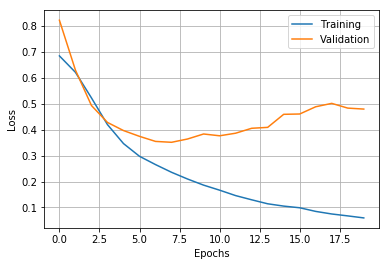

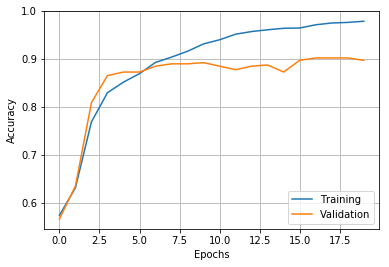

In [77]:
history_plot(histories_sig_32[2])

In [30]:
def cnn_model_sgd():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.20))
    model.add(Conv3D(512, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True),
                  metrics=['accuracy'])
    model.summary()
    return model

In [31]:
create_nn_model = cnn_model_sgd

In [82]:
epchs = 20
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_sgd_32=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_sgd_32.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.min(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_41 (Conv3D)           (None, 64, 14, 13, 16)    129664    
_________________________________________________________________
conv3d_42 (Conv3D)           (None, 128, 12, 11, 14)   221312    
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 128, 6, 5, 7)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 6, 5, 7)      0         
_________________________________________________________________
conv3d_43 (Conv3D)           (None, 256, 4, 3, 5)      884992    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256, 4, 3, 5)      0         
_________________________________________________________________
conv3d_44 (Conv3D)           (None, 512, 2, 1, 3)      353

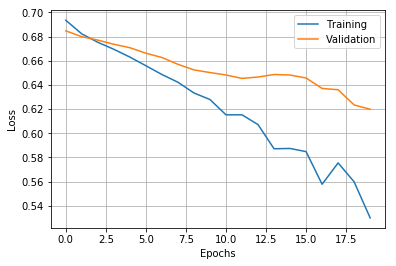

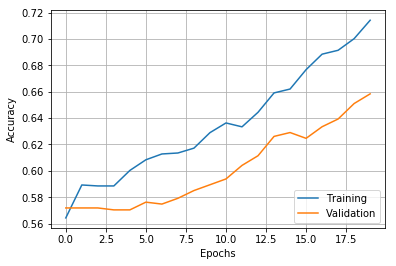

In [84]:
history_plot(histories_sgd_32[0])

In [32]:
epchs = 30
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_sgd_32_30=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_sgd_32_30.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.min(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 64, 14, 13, 16)    129664    
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 128, 12, 11, 14)   221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 128, 6, 5, 7)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 6, 5, 7)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 256, 4, 3, 5)      884992    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256, 4, 3, 5)      0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 512, 2, 1, 3)      353

1363/1363 [==============================] - 18s - loss: 0.4746 - acc: 0.7880    
Epoch 2/30
1363/1363 [==============================] - 18s - loss: 0.4197 - acc: 0.8092    
Epoch 3/30
1363/1363 [==============================] - 18s - loss: 0.5522 - acc: 0.7799    
Epoch 4/30
1363/1363 [==============================] - 18s - loss: 0.4166 - acc: 0.8173    
Epoch 5/30
1363/1363 [==============================] - 18s - loss: 0.3938 - acc: 0.8195    
Epoch 6/30
1363/1363 [==============================] - 18s - loss: 0.3839 - acc: 0.8349    
Epoch 7/30
1363/1363 [==============================] - 18s - loss: 0.4057 - acc: 0.8202    
Epoch 8/30
1363/1363 [==============================] - 18s - loss: 0.3669 - acc: 0.8430    
Epoch 9/30
1363/1363 [==============================] - 18s - loss: 0.3608 - acc: 0.8327    
Epoch 10/30
1363/1363 [==============================] - 18s - loss: 0.3918 - acc: 0.8364    
Epoch 11/30
1363/1363 [==============================] - 18s - loss: 0.3692 - ac

In [ ]:
history_plot(histories_sig_32_30[0])

In [34]:
epchs = 40
batch = 64

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_sgd_32_30=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_sgd_32_30.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.min(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 64, 14, 13, 16)    129664    
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 128, 12, 11, 14)   221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 128, 6, 5, 7)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 6, 5, 7)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 256, 4, 3, 5)      884992    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256, 4, 3, 5)      0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 512, 2, 1, 3)      353

Train on 1362 samples, validate on 681 samples
Epoch 1/40
1362/1362 [==============================] - 20s - loss: 0.6923 - acc: 0.5617 - val_loss: 0.6874 - val_acc: 0.5771
Epoch 2/40
1362/1362 [==============================] - 19s - loss: 0.6861 - acc: 0.5734 - val_loss: 0.6848 - val_acc: 0.5742
Epoch 3/40
1362/1362 [==============================] - 19s - loss: 0.6813 - acc: 0.5808 - val_loss: 0.6823 - val_acc: 0.5712
Epoch 4/40
1362/1362 [==============================] - 19s - loss: 0.6774 - acc: 0.5786 - val_loss: 0.6802 - val_acc: 0.5727
Epoch 5/40
1362/1362 [==============================] - 19s - loss: 0.6723 - acc: 0.5896 - val_loss: 0.6784 - val_acc: 0.5742
Epoch 6/40
1362/1362 [==============================] - 19s - loss: 0.6704 - acc: 0.5866 - val_loss: 0.6768 - val_acc: 0.5771
Epoch 7/40
1362/1362 [==============================] - 19s - loss: 0.6664 - acc: 0.5896 - val_loss: 0.6751 - val_acc: 0.5742
Epoch 8/40
1362/1362 [==============================] - 19s - loss: 0.6

KeyboardInterrupt: 

In [41]:
def cnn_model_sig():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.20))
    model.add(Conv3D(512, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    return model

In [42]:
create_nn_model = cnn_model_sig

In [43]:
epchs = 30
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_sig_32_30=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_sig_32_30.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.min(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 64, 14, 13, 16)    129664    
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 128, 12, 11, 14)   221312    
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 128, 6, 5, 7)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 6, 5, 7)      0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 256, 4, 3, 5)      884992    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256, 4, 3, 5)      0         
_________________________________________________________________
conv3d_24 (Conv3D)           (None, 512, 2, 1, 3)      353

1363/1363 [==============================] - 21s - loss: 0.0263 - acc: 0.9912 - val_loss: 0.5951 - val_acc: 0.8926
Training acc: 0.994131, Validation acc: 0.570588
Epoch 1/30
1363/1363 [==============================] - 18s - loss: 0.0235 - acc: 0.9934    
Epoch 2/30
1363/1363 [==============================] - 18s - loss: 0.0241 - acc: 0.9941    
Epoch 3/30
1363/1363 [==============================] - 18s - loss: 0.0199 - acc: 0.9956    
Epoch 4/30
1363/1363 [==============================] - 18s - loss: 0.0075 - acc: 0.9963    
Epoch 5/30
1363/1363 [==============================] - 18s - loss: 0.0498 - acc: 0.9875    
Epoch 6/30
1363/1363 [==============================] - 18s - loss: 0.0313 - acc: 0.9949    
Epoch 7/30
1363/1363 [==============================] - 18s - loss: 0.0078 - acc: 0.9985    
Epoch 8/30
1363/1363 [==============================] - 18s - loss: 0.0057 - acc: 0.9985    
Epoch 9/30
1363/1363 [==============================] - 18s - loss: 0.0175 - acc: 0.9963    

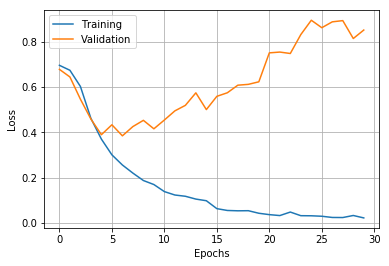

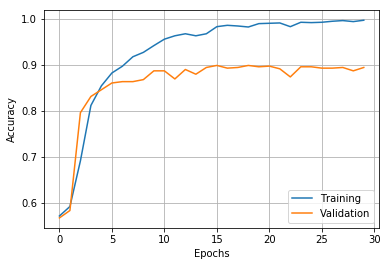

In [44]:
history_plot(histories_sig_32_30[0])

In [48]:
from keras import backend as K
K.clear_session()

In [50]:
def cnn_model_sig():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=inputshape))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.20))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.30))
    model.add(Conv3D(512, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=05.),
                  metrics=['accuracy'])
    model.summary()
    return model

In [51]:
create_nn_model = cnn_model_sig

In [52]:
epchs = 30
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=3)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_sig_32_30d=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_sig_32_30d.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 64, 14, 13, 16)    129664    
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 128, 12, 11, 14)   221312    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 128, 6, 5, 7)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 6, 5, 7)      0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 256, 4, 3, 5)      884992    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256, 4, 3, 5)      0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 512, 2, 1, 3)      353

1363/1363 [==============================] - 21s - loss: 1.1921e-07 - acc: 0.4329 - val_loss: 1.1921e-07 - val_acc: 0.4324
Training acc: 0.991930, Validation acc: 0.932353
Epoch 1/30
1363/1363 [==============================] - 18s - loss: 0.3467 - acc: 0.9442    
Epoch 2/30
1363/1363 [==============================] - 18s - loss: 0.2428 - acc: 0.9611    
Epoch 3/30
1363/1363 [==============================] - 18s - loss: 0.1899 - acc: 0.9736    
Epoch 4/30
1363/1363 [==============================] - 18s - loss: 0.1525 - acc: 0.9846    
Epoch 5/30
1363/1363 [==============================] - 18s - loss: 0.1470 - acc: 0.9861    
Epoch 6/30
1363/1363 [==============================] - 18s - loss: 0.1370 - acc: 0.9897    
Epoch 7/30
1363/1363 [==============================] - 18s - loss: 0.1363 - acc: 0.9897    
Epoch 8/30
1363/1363 [==============================] - 18s - loss: 0.1376 - acc: 0.9890    
Epoch 9/30
1363/1363 [==============================] - 18s - loss: 0.1384 - acc: 0.

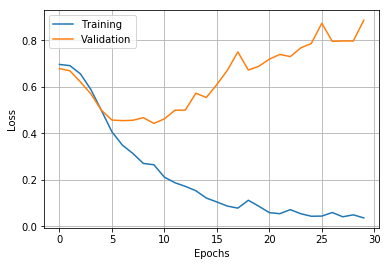

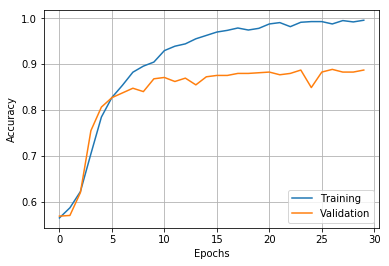

In [49]:
history_plot(histories_sig_32_30d[0])

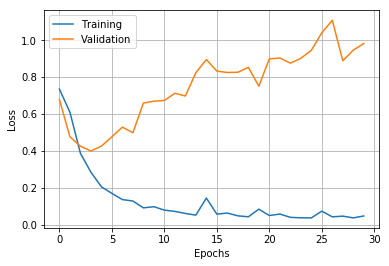

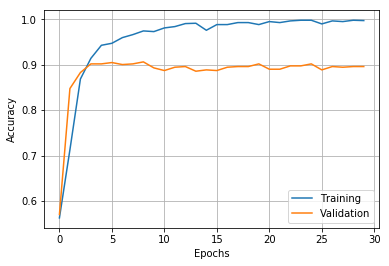

In [56]:
history_plot(histories_sig_32_30d[0])

In [78]:
def cnn_model_deeper():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(ZeroPadding3D((3,3,3), input_shape=inputshape))
    model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))#, input_shape=inputshape))
    model.add(Dropout(0.10))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(ZeroPadding3D((3,3,3)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.20))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.30))
    model.add(Conv3D(512, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=0.02),
                  metrics=['accuracy'])
    model.summary()
    return model

In [79]:
create_nn_model = cnn_model_deeper

In [82]:
epchs = 50
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=2)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_deep=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_deep.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_13 (ZeroPaddi (None, 75, 22, 21, 24)    0         
_________________________________________________________________
conv3d_54 (Conv3D)           (None, 32, 20, 19, 22)    64832     
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 20, 19, 22)    0         
_________________________________________________________________
max_pooling3d_20 (MaxPooling (None, 32, 10, 9, 11)     0         
_________________________________________________________________
conv3d_55 (Conv3D)           (None, 64, 8, 7, 9)       55360     
_________________________________________________________________
conv3d_56 (Conv3D)           (None, 128, 6, 5, 7)      221312    
_________________________________________________________________
zero_padding3d_14 (ZeroPaddi (None, 128, 12, 11, 13)   0  

KeyboardInterrupt: 

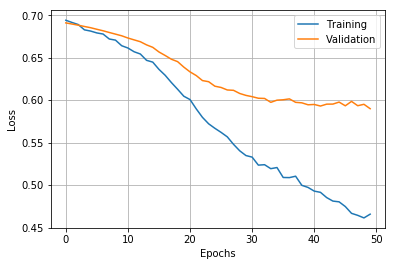

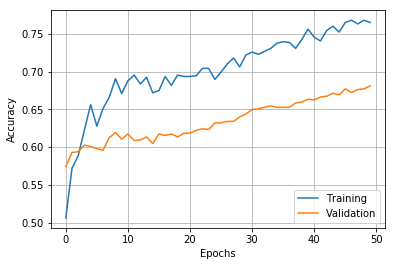

In [83]:
history_plot(histories_deep[0])

In [84]:
def cnn_model_deeper():
    early_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)
    model = Sequential()
    
    model.add(ZeroPadding3D((3,3,3), input_shape=inputshape))
    model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))#, input_shape=inputshape))
    model.add(Dropout(0.10))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
    model.add(Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(ZeroPadding3D((3,3,3)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.20))
    model.add(Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(Dropout(0.30))
    model.add(Conv3D(512, (3, 3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=0.05),
                  metrics=['accuracy'])
    model.summary()
    return model

In [85]:
create_nn_model = cnn_model_deeper

In [86]:
epchs = 50
batch = 32

#cnn first attempt - new dataset + tf with 'channels_first'
skf = StratifiedKFold(n_splits=2)
best_validation_acc = 0.0
best_model = None
num_classes = 2
histories_deep=[]
for i, (train_index, validation_index) in enumerate(skf.split(X_train, Y_train)):
    print("Test nr.: ", i+1)
    
    Xtrain, Xvalidation = X_train[train_index], X_train[validation_index]
    ytrain, yvalidation = Y_train[train_index], Y_train[validation_index]
    model = create_nn_model()
    Ytrain = np_utils.to_categorical(ytrain)
    Yvalidation = np_utils.to_categorical(yvalidation)

    history = model.fit(Xtrain, Ytrain, batch_size=batch,
                        epochs=epchs, verbose=1,
                        validation_data = (Xvalidation, Yvalidation), shuffle=False)
    histories_deep.append(history)
    training_acc = history.history['acc']
    validation_acc = history.history['val_acc']
    print("Training acc: %f, Validation acc: %f" %(np.max(training_acc),np.max(validation_acc)))
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        best_model = model

Ytrain = np_utils.to_categorical(ytrain)
best_history = best_model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epchs)  # replicate conf.

predictions = best_model.predict(X_test)
cls_predictions = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, cls_predictions)
print("Accuracy score: ", score)

('Test nr.: ', 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_17 (ZeroPaddi (None, 75, 22, 21, 24)    0         
_________________________________________________________________
conv3d_64 (Conv3D)           (None, 32, 20, 19, 22)    64832     
_________________________________________________________________
dropout_36 (Dropout)         (None, 32, 20, 19, 22)    0         
_________________________________________________________________
max_pooling3d_24 (MaxPooling (None, 32, 10, 9, 11)     0         
_________________________________________________________________
conv3d_65 (Conv3D)           (None, 64, 8, 7, 9)       55360     
_________________________________________________________________
conv3d_66 (Conv3D)           (None, 128, 6, 5, 7)      221312    
_________________________________________________________________
zero_padding3d_18 (ZeroPaddi (None, 128, 12, 11, 13)   0  

1022/1022 [==============================] - 22s - loss: 0.3651 - acc: 0.8474 - val_loss: 0.5074 - val_acc: 0.7963
Epoch 44/50
1022/1022 [==============================] - 22s - loss: 0.3504 - acc: 0.8532 - val_loss: 0.6694 - val_acc: 0.7326
Epoch 45/50
1022/1022 [==============================] - 22s - loss: 0.3531 - acc: 0.8503 - val_loss: 0.7033 - val_acc: 0.7238
Epoch 46/50
1022/1022 [==============================] - 22s - loss: 0.3377 - acc: 0.8689 - val_loss: 0.5186 - val_acc: 0.8022
Epoch 47/50
1022/1022 [==============================] - 22s - loss: 0.3312 - acc: 0.8689 - val_loss: 0.5003 - val_acc: 0.8071
Epoch 48/50
1022/1022 [==============================] - 22s - loss: 0.3384 - acc: 0.8601 - val_loss: 0.4955 - val_acc: 0.8090
Epoch 49/50
1022/1022 [==============================] - 22s - loss: 0.3223 - acc: 0.8738 - val_loss: 0.5255 - val_acc: 0.8022
Epoch 50/50
1022/1022 [==============================] - 22s - loss: 0.3172 - acc: 0.8796 - val_loss: 0.5339 - val_acc: 0.8

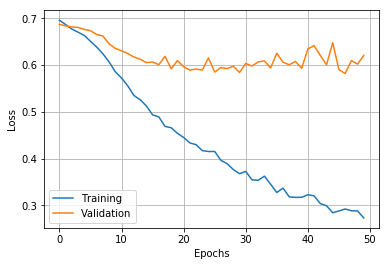

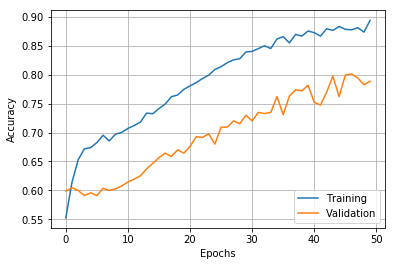

In [90]:
history_plot(histories_deep[0])